#### Log type 27 - Dataset extension records

In [1]:
import pandas as pd
import logspecs
import matplotlib.pyplot as plt
import seaborn as sns

hdf = pd.HDFStore('hdf5/logs_212_219.h5')
df = hdf['df']

In [2]:
# make a separate dataframe with log x'27' subtype x'02' records only 
log27 = df[(df['type'] == '27') & (df['subtype'] == '02')].copy()

# extract x'27' specifc values
log27['flag']  = log27['blob'].apply(lambda x: int(x[11:12].hex(),16))
log27          = log27[log27['flag'] > 0]   # I care only about interesting values - phase 2 records
log27['dbd']   = log27['blob'].apply(lambda x: x[2:10].decode('cp500'))
log27['sizeh'] = log27['blob'].apply(lambda x: x[50:54].hex())
log27['size']  = log27['blob'].apply(lambda x: int(x[50:54].hex(), 16))
log27['dcb']   = log27['blob'].apply(lambda x: int(x[10:11].hex(),16))

for group, frame in log27.groupby('dbd'):
    print('Dbd {} has count {}'.format(group, frame.shape[0]))

dbname = 'BA1P0050'
dbexts = log27[log27['dbd'] == dbname]

dbexts

Dbd BA1P0050 has count 7
Dbd D158     has count 1
Dbd DVAS7300 has count 26
Dbd DVAS7310 has count 2116
Dbd FFIP0050 has count 13
Dbd FFIP0051 has count 16


,blob,type,subtype,sequence,tod,datetime,timestamp,flag,dbd,sizeh,size,dcb
1295,"b""'\x02\xc2\xc1\xf1\xd7\xf0\xf0\xf5\xf0\x01 \x...",27,02,1296,15327456019323805410,2018-07-31 19:38:12.217725,2.669892e+06,32,BA1P0050,000f7800,1013760,1
14237,"b""'\x02\xc2\xc1\xf1\xd7\xf0\xf0\xf5\xf0\x01 \x...",27,02,59113,15327456185138681794,2018-07-31 19:38:52.699873,2.669933e+06,32,BA1P0050,00173400,1520640,1
43933,"b""'\x02\xc2\xc1\xf1\xd7\xf0\xf0\xf5\xf0\x01 \x...",27,02,88809,15327456268965148026,2018-07-31 19:39:13.165319,2.669953e+06,32,BA1P0050,001ef000,2027520,1
25339,"b""'\x02\xc2\xc1\xf1\xd7\xf0\xf0\xf5\xf0\x01 \x...",27,02,118528,15327456345820806440,2018-07-31 19:39:31.928907,2.669972e+06,32,BA1P0050,0026ac00,2534400,1
6727,"b""'\x02\xc2\xc1\xf1\xd7\xf0\xf0\xf5\xf0\x01 \x...",27,02,148231,15327456410770662536,2018-07-31 19:39:47.785806,2.669988e+06,32,BA1P0050,002e6800,3041280,1
36421,"b""'\x02\xc2\xc1\xf1\xd7\xf0\xf0\xf5\xf0\x01 \x...",27,02,177925,15327456468000863536,2018-07-31 19:40:01.758023,2.670002e+06,32,BA1P0050,00362400,3548160,1
17814,"b""'\x02\xc2\xc1\xf1\xd7\xf0\xf0\xf5\xf0\x01 \x...",27,02,207628,15327456551490635202,2018-07-31 19:40:22.141268,2.670022e+06,32,BA1P0050,003de000,4055040,1


<IPython.core.display.Javascript object>


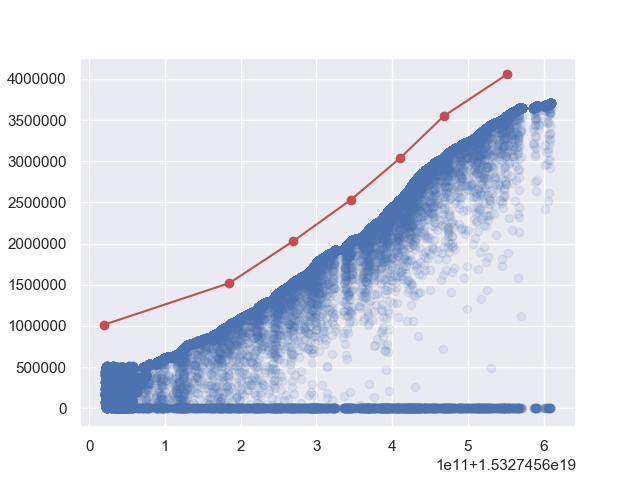

In [3]:
%matplotlib notebook
sns.set()
plt.figure()
plt.plot(dbexts['tod'], dbexts['size'], '-ro')

In [4]:
# make a separate dataframe with log x'50' records only 
log50 = df[df['type'] == '50'].copy()

# extract x'50' specifc values
logspecs.extract_typespecific_fields(logspecs.log_items['50'], log50)
dbupdates = log50[log50['dbd'] == dbname]

In [5]:
plt.scatter(dbupdates['tod'], dbupdates['rba'], alpha=0.1)